# Import packages

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

import sqlite3
import pandas as pd
import numpy as np
import os
import openpyxl

# Download

- You need to change the last value in end (24) to make the scripts download the latest data.

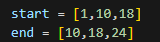

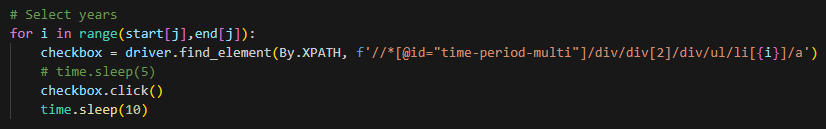

- The meaning of "i" in the code:
    - when i is 1, then you choose 2000,
    - ....., 
    - when i is 23, then you choose 2022.

- You also need to change the number after "li" in the code below since the website automatically choose the latest the year.

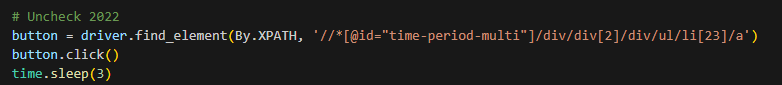

## Analyse by service level

In [ ]:
start = [1,10,18]
end = [10,18,24]
for j in range(len(start)):
    # Initialize the webdriver (e.g., Chrome)
    driver = webdriver.Chrome(executable_path =r'C:/Users/panda/Downloads/chromedriver-win32/chromedriver.exe')

    # Open the webpage
    driver.get("https://washdata.org/data/household#!/table?geo0=region&geo1=sdg")
    time.sleep(5)

    ## Click level 0 button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/button')
    button.click()
    time.sleep(3)

    # Click the "Country" button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/div/div[2]/div/ul/li[3]/a')
    time.sleep(2)
    button.click()
    time.sleep(3)

    # Click the level 1 button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
    button.click()
    time.sleep(3)


    # Select all the countries
    for i in range(1,9):
        checkbox = driver.find_element(By.XPATH, f'//*[@id="geography-level-1"]/div/div[2]/div[{i}]/div')
        # time.sleep(5)
        checkbox.click()
        time.sleep(5)

    # time.sleep(20)

    # Click the level 1 button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
    button.click()
    time.sleep(3)

    # Uncheck Hygiene button
    button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='service-types-checkbox-2']"))
    )
    # driver.find_element(By.ID, "service-types-checkbox-2")
    button.click()
    time.sleep(3)


    # # Select "Analyse by facility type"
    # button = WebDriverWait(driver, 10).until(
    #     EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='ladderType-1']"))
    # )
    # button.click()
    # time.sleep(3)

    # Click the year button
    button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
    button.click()
    time.sleep(3)

    # Uncheck 2022
    button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/div/div[2]/div/ul/li[23]/a')
    button.click()
    time.sleep(3)

    # Select years 
    for i in range(start[j],end[j]):
        checkbox = driver.find_element(By.XPATH, f'//*[@id="time-period-multi"]/div/div[2]/div/ul/li[{i}]/a')
        # time.sleep(5)
        checkbox.click()
        time.sleep(10)

    time.sleep(40)

    # Click the year button
    button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
    button.click()
    time.sleep(3)

    # Click the download button
    button = driver.find_element(By.XPATH, '//*[@id="page--table"]/div[1]/div/div[2]/button')
    button.click()
    time.sleep(3)

    # Close the browser
    driver.quit()
        


### Checking years

In [ ]:
df1 = pd.read_csv('service level/washdash-download.csv')
df2 = pd.read_csv('service level/washdash-download (1).csv')
df3 = pd.read_csv('service level/washdash-download (2).csv')
df = pd.concat([df1,df2,df3], ignore_index=True)
df = df[df['Service Type'] != 'Hygiene']
df.rename(columns={'Country':'Country Name'}, inplace=True)
df
len(df.Year.unique()) == df.Year.max() - df.Year.min() + 1
# if it's true, then you have download all the years.
# To check which years are missing
df.sort_values(by='Year').Year.unique()

### In case you miss some years, you can download data use the code below
- You may change the start and end number in range()

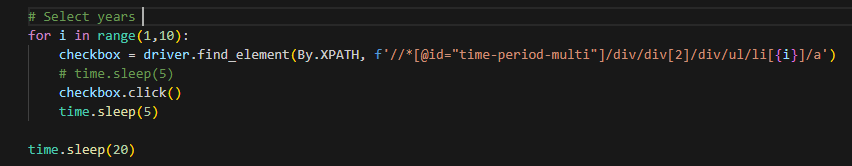

- The meaning of "i" in the code:
    - when i is 1, then you choose 2000,
    - ....., 
    - when i is 23, then you choose 2022.


In [ ]:


# Initialize the webdriver (e.g., Chrome)
driver = webdriver.Chrome(executable_path =r'C:/Users/panda/Downloads/chromedriver-win32/chromedriver.exe')

# Open the webpage
driver.get("https://washdata.org/data/household#!/table?geo0=region&geo1=sdg")
time.sleep(5)

## Click level 0 button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/button')
button.click()
time.sleep(3)

# Click the "Country" button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/div/div[2]/div/ul/li[3]/a')
time.sleep(2)
button.click()
time.sleep(3)

# Click the level 1 button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
button.click()
time.sleep(3)

# Select all the countries
for i in range(1,9):
    checkbox = driver.find_element(By.XPATH, f'//*[@id="geography-level-1"]/div/div[2]/div[{i}]/div')
    # time.sleep(5)
    checkbox.click()
    time.sleep(5)

# time.sleep(20)

# Click the level 1 button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
button.click()
time.sleep(3)

# Uncheck Hygiene button
button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='service-types-checkbox-2']"))
)
# driver.find_element(By.ID, "service-types-checkbox-2")
button.click()
time.sleep(3)

# Click the year button
button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
button.click()
time.sleep(3)

# Select years 
for i in range(1,10):
    checkbox = driver.find_element(By.XPATH, f'//*[@id="time-period-multi"]/div/div[2]/div/ul/li[{i}]/a')
    # time.sleep(5)
    checkbox.click()
    time.sleep(5)

time.sleep(20)


# Click the year button
button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
button.click()
time.sleep(3)

# Click the download button
button = driver.find_element(By.XPATH, '//*[@id="page--table"]/div[1]/div/div[2]/button')
button.click()
time.sleep(3)

# Close the browser
driver.quit()

## Analyse by facility type

In [ ]:
start = [1,10,18]
end = [10,18,24]
for j in range(len(start)):
    # Initialize the webdriver (e.g., Chrome)
    driver = webdriver.Chrome(executable_path =r'C:/Users/panda/Downloads/chromedriver-win32/chromedriver.exe')

    # Open the webpage
    driver.get("https://washdata.org/data/household#!/table?geo0=region&geo1=sdg")
    time.sleep(5)

    ## Click level 0 button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/button')
    button.click()
    time.sleep(3)

    # Click the "Country" button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/div/div[2]/div/ul/li[3]/a')
    time.sleep(2)
    button.click()
    time.sleep(3)

    # Click the level 1 button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
    button.click()
    time.sleep(3)

    # Select all the countries
    for i in range(1,9):
        checkbox = driver.find_element(By.XPATH, f'//*[@id="geography-level-1"]/div/div[2]/div[{i}]/div')
        # time.sleep(5)
        checkbox.click()
        time.sleep(5)

    # time.sleep(20)

    # Click the level 1 button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
    button.click()
    time.sleep(3)

    # Uncheck Hygiene button
    button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='service-types-checkbox-2']"))
    )
    # driver.find_element(By.ID, "service-types-checkbox-2")
    button.click()
    time.sleep(3)


    # Select "Analyse by facility type"
    button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='ladderType-1']"))
    )
    button.click()
    time.sleep(3)

    # Click the year button
    button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
    button.click()
    time.sleep(3)

    # Uncheck 2022
    button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/div/div[2]/div/ul/li[23]/a')
    button.click()
    time.sleep(3)

    # Select years 
    for i in range(start[j],end[j]):
        checkbox = driver.find_element(By.XPATH, f'//*[@id="time-period-multi"]/div/div[2]/div/ul/li[{i}]/a')
        # time.sleep(5)
        checkbox.click()
        time.sleep(10)

    time.sleep(40)

    # Click the year button
    button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
    button.click()
    time.sleep(3)

    # Click the download button
    button = driver.find_element(By.XPATH, '//*[@id="page--table"]/div[1]/div/div[2]/button')
    button.click()
    time.sleep(3)

    # Close the browser
    driver.quit()
        


### Checking years

In [ ]:
dt1 = pd.read_csv('facility type/washdash-download.csv')
dt2 = pd.read_csv('facility type/washdash-download (1).csv')
dt3 = pd.read_csv('facility type/washdash-download (2).csv')
dt = pd.concat([dt1,dt2,dt3], ignore_index=True)
dt = dt[dt['Service Type'] != 'Hygiene']
dt.rename(columns={'Country':'Country Name'}, inplace=True)
dt
len(dt.Year.unique()) == dt.Year.max() - dt.Year.min() + 1
# if it's true, then you have download all the years.
# To check which years are missing
dt.sort_values(by='Year').Year.unique()

### In case you miss some years, you can download data use the code below
- You may change the start and end number in range()

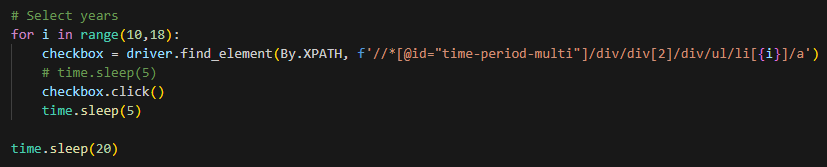

- The meaning of "i" in the code:
    - when i is 1, then you choose 2000,
    - ....., 
    - when i is 23, then you choose 2022.


In [ ]:
# Initialize the webdriver (e.g., Chrome)
driver = webdriver.Chrome(executable_path =r'C:/Users/panda/Downloads/chromedriver-win32/chromedriver.exe')

# Open the webpage
driver.get("https://washdata.org/data/household#!/table?geo0=region&geo1=sdg")
time.sleep(5)

## Click level 0 button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/button')
button.click()
time.sleep(3)

# Click the "Country" button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/div/div[2]/div/ul/li[3]/a')
time.sleep(2)
button.click()
time.sleep(3)

# Click the level 1 button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
button.click()
time.sleep(3)

# Select all the countries
for i in range(1,9):
    checkbox = driver.find_element(By.XPATH, f'//*[@id="geography-level-1"]/div/div[2]/div[{i}]/div')
    # time.sleep(5)
    checkbox.click()
    time.sleep(5)

# time.sleep(20)

# Click the level 1 button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
button.click()
time.sleep(3)

# Uncheck Hygiene button
button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='service-types-checkbox-2']"))
)
# driver.find_element(By.ID, "service-types-checkbox-2")
button.click()
time.sleep(3)


# Select "Analyse by facility type"
button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='ladderType-1']"))
)
button.click()
time.sleep(3)

# Click the year button
button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
button.click()
time.sleep(3)

# Uncheck 2022
button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/div/div[2]/div/ul/li[23]/a')
button.click()
time.sleep(3)

# Select years 
for i in range(10,18):
    checkbox = driver.find_element(By.XPATH, f'//*[@id="time-period-multi"]/div/div[2]/div/ul/li[{i}]/a')
    # time.sleep(5)
    checkbox.click()
    time.sleep(5)

time.sleep(20)

# Click the year button
button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
button.click()
time.sleep(3)

# Click the download button
button = driver.find_element(By.XPATH, '//*[@id="page--table"]/div[1]/div/div[2]/button')
button.click()
time.sleep(3)

# Close the browser
driver.quit()

## Analyse by safely managed criteria

In [ ]:
start = [1,10,18]
end = [10,18,24]
for j in range(len(start)):
    # Initialize the webdriver (e.g., Chrome)
    driver = webdriver.Chrome(executable_path =r'C:/Users/panda/Downloads/chromedriver-win32/chromedriver.exe')

    # Open the webpage
    driver.get("https://washdata.org/data/household#!/table?geo0=region&geo1=sdg")
    time.sleep(5)

    ## Click level 0 button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/button')
    button.click()
    time.sleep(3)

    # Click the "Country" button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/div/div[2]/div/ul/li[3]/a')
    time.sleep(2)
    button.click()
    time.sleep(3)

    # Click the level 1 button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
    button.click()
    time.sleep(3)

    # Select all the countries
    for i in range(1,9):
        checkbox = driver.find_element(By.XPATH, f'//*[@id="geography-level-1"]/div/div[2]/div[{i}]/div')
        # time.sleep(5)
        checkbox.click()
        time.sleep(5)

    # time.sleep(20)

    # Click the level 1 button
    button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
    button.click()
    time.sleep(3)

    # Uncheck Hygiene button
    button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='service-types-checkbox-2']"))
    )
    # driver.find_element(By.ID, "service-types-checkbox-2")
    button.click()
    time.sleep(3)


    # Select "Analyse by safely managed criteria"
    button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='ladderType-2']"))
    )
    button.click()
    time.sleep(3)

    # Click the year button
    button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
    button.click()
    time.sleep(3)

    # Uncheck 2022
    button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/div/div[2]/div/ul/li[23]/a')
    button.click()
    time.sleep(3)

    # Select years 
    for i in range(start[j],end[j]):
        checkbox = driver.find_element(By.XPATH, f'//*[@id="time-period-multi"]/div/div[2]/div/ul/li[{i}]/a')
        # time.sleep(5)
        checkbox.click()
        time.sleep(10)

    time.sleep(40)

    # Click the year button
    button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
    button.click()
    time.sleep(3)

    # Click the download button
    button = driver.find_element(By.XPATH, '//*[@id="page--table"]/div[1]/div/div[2]/button')
    button.click()
    time.sleep(3)

    # Close the browser
    driver.quit()
        


### Checking years

In [ ]:
dt1 = pd.read_csv('safely managed criteria/washdash-download.csv')
dt2 = pd.read_csv('safely managed criteria/washdash-download (1).csv')
dt3 = pd.read_csv('safely managed criteria/washdash-download (2).csv')
dt = pd.concat([dt1,dt2,dt3], ignore_index=True)
dt = dt[dt['Service Type'] != 'Hygiene']
dt.rename(columns={'Country':'Country Name'}, inplace=True)
dt
len(dt.Year.unique()) == dt.Year.max() - dt.Year.min() + 1
# if it's true, then you have download all the years.
# To check which years are missing
dt.sort_values(by='Year').Year.unique()

### In case you miss some years, you can download data use the code below
- You may change the start and end number in range()

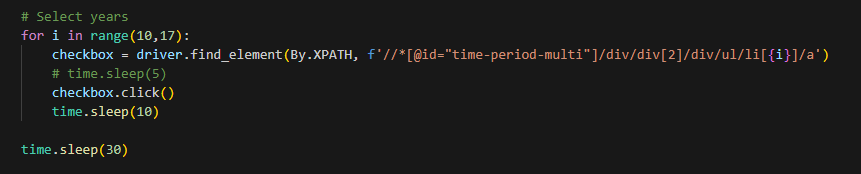

- The meaning of "i" in the code:
    - when i is 1, then you choose 2000,
    - ....., 
    - when i is 23, then you choose 2022.


In [ ]:
# Initialize the webdriver (e.g., Chrome)
driver = webdriver.Chrome(executable_path =r'C:/Users/panda/Downloads/chromedriver-win32/chromedriver.exe')

# Open the webpage
driver.get("https://washdata.org/data/household#!/table?geo0=region&geo1=sdg")
time.sleep(5)

## Click level 0 button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/button')
button.click()
time.sleep(3)

# Click the "Country" button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-0"]/div/div[2]/div/ul/li[3]/a')
time.sleep(2)
button.click()
time.sleep(3)

# Click the level 1 button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
button.click()
time.sleep(3)

# Select all the countries
for i in range(1,9):
    checkbox = driver.find_element(By.XPATH, f'//*[@id="geography-level-1"]/div/div[2]/div[{i}]/div')
    # time.sleep(5)
    checkbox.click()
    time.sleep(5)

# time.sleep(20)

# Click the level 1 button
button = driver.find_element(By.XPATH, '//*[@id="geography-level-1"]/button')
button.click()
time.sleep(3)

# Uncheck Hygiene button
button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='service-types-checkbox-2']"))
)
# driver.find_element(By.ID, "service-types-checkbox-2")
button.click()
time.sleep(3)


# Select "Analyse by safely managed criteria"
button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, "label[for='ladderType-2']"))
)
button.click()
time.sleep(3)

# Click the year button
button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
button.click()
time.sleep(3)

# Uncheck 2022
button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/div/div[2]/div/ul/li[23]/a')
button.click()
time.sleep(3)

# Select years 
for i in range(10,17):
    checkbox = driver.find_element(By.XPATH, f'//*[@id="time-period-multi"]/div/div[2]/div/ul/li[{i}]/a')
    # time.sleep(5)
    checkbox.click()
    time.sleep(10)

time.sleep(30)

# Click the year button
button = driver.find_element(By.XPATH, '//*[@id="time-period-multi"]/button')
button.click()
time.sleep(3)

# Click the download button
button = driver.find_element(By.XPATH, '//*[@id="page--table"]/div[1]/div/div[2]/button')
button.click()
time.sleep(3)

# Close the browser
driver.quit()

# Importing

## Directly Found

### service level

In [ ]:
df1 = pd.read_csv('service level/washdash-download.csv')
df2 = pd.read_csv('service level/washdash-download (1).csv')
df3 = pd.read_csv('service level/washdash-download (2).csv')
df = pd.concat([df1,df2,df3], ignore_index=True)
df = df[df['Service Type'] != 'Hygiene']
df.rename(columns={'Country':'Country Name'}, inplace=True)
df
dd = pd.read_excel('DataDict.xlsx', sheet_name='72 found')
dd = dd[~dd['Service level'].isna()]
dd

country = pd.read_excel('Country.xlsx')

for i in dd.index:
    v = dd.loc[i,'Variable']
    rt = dd.loc[i,'Residence Type']
    st = dd.loc[i,'Service Type']
    sl = dd.loc[i,'Service level']
    c = dd.loc[i,'Column']
    data = df[
        (df['Residence Type'] == rt)
        &
        (df['Service Type'] == st)
        &
        (df['Service level'] == sl)
    ]
    data = data[['Country Name','Year', c]]
    data.rename(columns={c:'val'}, inplace=True)
    if dd.isnull().loc[i,'Decimal Places']:
        data = data
    else:
        d = int(dd.loc[i,'Decimal Places'])
        data.val = round(data.val, d)

    if dd.isnull().loc[i,'Formula']:
        data = data
    else:
        f = "val" + str(dd.loc[i,'Formula'])
        data.val = data.eval(f)

    n = 'Country Name'
    y = 'Year'
    first_last = data.sort_values([n,y]).groupby(data[n])['val'] \
            .agg(['first', 'last']).reset_index()
    first_last = first_last.rename(columns={"first": "Earliest", "last": "MostRecent"})
    data = data.pivot_table(index = n,
                    columns= y,
                    values = 'val').reset_index()
    data = data.merge(first_last,
                on = n,
                how = 'left')
    data = country.merge(data,
                    on = n,
                    how = 'left')
    data = data.drop(columns= n)
    data = data.drop_duplicates()
    data.to_csv(f'IFs Import/{v}.csv', index = False)

### facility type

In [ ]:
dt1 = pd.read_csv('facility type/washdash-download.csv')
dt2 = pd.read_csv('facility type/washdash-download (1).csv')
dt3 = pd.read_csv('facility type/washdash-download (2).csv')
dt = pd.concat([dt1,dt2,dt3], ignore_index=True)
dt = dt[dt['Service Type'] != 'Hygiene']
dt.rename(columns={'Country':'Country Name'}, inplace=True)
dt
dd = pd.read_excel('DataDict.xlsx', sheet_name='72 found')
dd = dd[~dd['Facility type'].isna()]
dd

country = pd.read_excel('Country.xlsx')

for i in dd.index:
    v = dd.loc[i,'Variable']
    rt = dd.loc[i,'Residence Type']
    st = dd.loc[i,'Service Type']
    # sl = dd.loc[i,'Service level']
    ft = dd.loc[i,'Facility type']
    c = dd.loc[i,'Column']
    data = dt[
        (dt['Residence Type'] == rt)
        &
        (dt['Service Type'] == st)
        # &
        # (df['Service level'] == sl)
        &
        (dt['Facility type'] == ft)
    ]
    data = data[['Country Name','Year', c]]
    # data = data.groupby(['Country Name', 'Year']).sum(min_count=1).reset_index()
    data.rename(columns={c:'val'}, inplace=True)
    if dd.isnull().loc[i,'Decimal Places']:
        data = data
    else:
        d = int(dd.loc[i,'Decimal Places'])
        data.val = round(data.val, d)

    if dd.isnull().loc[i,'Formula']:
        data = data
    else:
        f = "val" + str(dd.loc[i,'Formula'])
        data.val = data.eval(f)
    n = 'Country Name'
    y = 'Year'
    first_last = data.sort_values([n,y]).groupby(data[n])['val'] \
            .agg(['first', 'last']).reset_index()
    first_last = first_last.rename(columns={"first": "Earliest", "last": "MostRecent"})
    data = data.pivot_table(index = n,
                    columns= y,
                    values = 'val').reset_index()
    data = data.merge(first_last,
                on = n,
                how = 'left')
    data = country.merge(data,
                    on = n,
                    how = 'left')
    data = data.drop(columns= n)
    data = data.drop_duplicates()
    data.to_csv(f'IFs Import/{v}.csv', index = False)

### safely managed

In [ ]:
dt1 = pd.read_csv('safely managed criteria/washdash-download.csv')
dt2 = pd.read_csv('safely managed criteria/washdash-download (1).csv')
dt3 = pd.read_csv('safely managed criteria/washdash-download (2).csv')
dt = pd.concat([dt1,dt2,dt3], ignore_index=True)
dt = dt[dt['Service Type'] != 'Hygiene']
dt.rename(columns={'Country':'Country Name'}, inplace=True)
dt
dd = pd.read_excel('DataDict.xlsx', sheet_name='72 found')
dd = dd[~dd['Safely managed element'].isna()]
dd

country = pd.read_excel('Country.xlsx')

for i in dd.index:
    v = dd.loc[i,'Variable']
    rt = dd.loc[i,'Residence Type']
    st = dd.loc[i,'Service Type']
    # sl = dd.loc[i,'Service level']
    # ft = dd.loc[i,'Facility type']
    sm = dd.loc[i, 'Safely managed element']
    c = dd.loc[i,'Column']
    data = dt[
        (dt['Residence Type'] == rt)
        &
        (dt['Service Type'] == st)
        &
        # (df['Service level'] == sl)
        # (dt['Facility type'] == ft)
        (dt['Safely managed element'] == sm)

    ]
    data = data[['Country Name','Year', c]]
    # data = data.groupby(['Country Name', 'Year']).sum(min_count=1).reset_index()
    data.rename(columns={c:'val'}, inplace=True)
    if dd.isnull().loc[i,'Decimal Places']:
        data = data
    else:
        d = int(dd.loc[i,'Decimal Places'])
        data.val = round(data.val, d)

    if dd.isnull().loc[i,'Formula']:
        data = data
    else:
        f = "val" + str(dd.loc[i,'Formula'])
        data.val = data.eval(f)
    n = 'Country Name'
    y = 'Year'
    first_last = data.sort_values([n,y]).groupby(data[n])['val'] \
            .agg(['first', 'last']).reset_index()
    first_last = first_last.rename(columns={"first": "Earliest", "last": "MostRecent"})
    data = data.pivot_table(index = n,
                    columns= y,
                    values = 'val').reset_index()
    data = data.merge(first_last,
                on = n,
                how = 'left')
    data = country.merge(data,
                    on = n,
                    how = 'left')
    data = data.drop(columns= n)
    data = data.drop_duplicates()
    data.to_csv(f'IFs Import/{v}.csv', index = False)
# data

## Calculated

### Group 1 At least basic minus Limited service 

In [ ]:
df1 = pd.read_csv('service level/washdash-download.csv')
df2 = pd.read_csv('service level/washdash-download (1).csv')
df3 = pd.read_csv('service level/washdash-download (2).csv')
df = pd.concat([df1,df2,df3], ignore_index=True)
df = df[df['Service Type'] != 'Hygiene']
df.rename(columns={'Country':'Country Name'}, inplace=True)
df

dd = pd.read_excel('DataDict.xlsx', sheet_name='36 Calculated')
dd = dd[dd['order'] == 1]
dd
country = pd.read_excel('Country.xlsx')

for i in dd.index:
    v = dd.loc[i,'Variable']
    rt = dd.loc[i,'Residence Type']
    st = dd.loc[i,'Service Type']
    # sl = dd.loc[i,'Service level']
    c = dd.loc[i,'Column']
    data = df[
        (df['Residence Type'] == rt)
        &
        (df['Service Type'] == st)
        # &
        # (df['Service level'] == sl)
    ]

    data1 = data[data['Service level'].isin(['At least basic'])]
    data1 = data1[['Country Name','Year', c]]
    data1.rename(columns={c:'val1'}, inplace=True)
    data2 = data[data['Service level'].isin(['Limited service'])]
    data2 = data2[['Country Name','Year', c]]
    data2.rename(columns={c:'val2'}, inplace=True)
    data = data1.merge(data2, on = ['Country Name','Year'], how = 'outer')
    data['val'] = data['val1'] - data['val2']
    data = data[['Country Name','Year', 'val']]
    # data.rename(columns={c:'val'}, inplace=True)
    data = data.groupby(['Country Name', 'Year']).sum(min_count=1).reset_index()

    if dd.isnull().loc[i,'Formula']:
        data = data
    else:
        f = "val" + str(dd.loc[i,'Formula'])
        data.val = data.eval(f)
        
    if dd.isnull().loc[i,'Decimal Places']:
        data = data
    else:
        d = int(dd.loc[i,'Decimal Places'])
        data.val = round(data.val, d)

    n = 'Country Name'
    y = 'Year'
    first_last = data.sort_values([n,y]).groupby(data[n])['val'] \
            .agg(['first', 'last']).reset_index()
    first_last = first_last.rename(columns={"first": "Earliest", "last": "MostRecent"})
    data = data.pivot_table(index = n,
                    columns= y,
                    values = 'val').reset_index()
    data = data.merge(first_last,
                on = n,
                how = 'left')
    data = country.merge(data,
                    on = n,
                    how = 'left')
    data = data.drop(columns= n)
    data = data.drop_duplicates()
    data.to_csv(f'IFs Import/{v}.csv', index = False)

# data
# data1.to_csv('atleast.csv')
# data2.to_csv('safelymanaged.csv')
#data1 and data2 can't merge, no same countries

### Group 2 Sum of Open defecation, Unimproved, and Limited service

In [ ]:
df1 = pd.read_csv('service level/washdash-download.csv')
df2 = pd.read_csv('service level/washdash-download (1).csv')
df3 = pd.read_csv('service level/washdash-download (2).csv')
df = pd.concat([df1,df2,df3], ignore_index=True)
df = df[df['Service Type'] != 'Hygiene']
df.rename(columns={'Country':'Country Name'}, inplace=True)
df
dd = pd.read_excel('DataDict.xlsx', sheet_name='36 Calculated')
dd = dd[dd['order'] == 2]
dd
country = pd.read_excel('Country.xlsx')

for i in dd.index:
    v = dd.loc[i,'Variable']
    rt = dd.loc[i,'Residence Type']
    st = dd.loc[i,'Service Type']
    # sl = dd.loc[i,'Service level']
    c = dd.loc[i,'Column']
    data = df[
        (df['Residence Type'] == rt)
        &
        (df['Service Type'] == st)
        # &
        # (df['Service level'] == sl)
    ]
    data = data[data['Service level'].isin(['Open defecation','Unimproved','Limited service'])]
    data = data[['Country Name','Year', c]]
    data.rename(columns={c:'val'}, inplace=True)
    data = data.groupby(['Country Name', 'Year']).sum(min_count=1).reset_index()

    if dd.isnull().loc[i,'Formula']:
        data = data
    else:
        f = "val" + str(dd.loc[i,'Formula'])
        data.val = data.eval(f)
        
    if dd.isnull().loc[i,'Decimal Places']:
        data = data
    else:
        d = int(dd.loc[i,'Decimal Places'])
        data.val = round(data.val, d)

    n = 'Country Name'
    y = 'Year'
    first_last = data.sort_values([n,y]).groupby(data[n])['val'] \
            .agg(['first', 'last']).reset_index()
    first_last = first_last.rename(columns={"first": "Earliest", "last": "MostRecent"})
    data = data.pivot_table(index = n,
                    columns= y,
                    values = 'val').reset_index()
    data = data.merge(first_last,
                on = n,
                how = 'left')
    data = country.merge(data,
                    on = n,
                    how = 'left')
    data = data.drop(columns= n)
    data = data.drop_duplicates()
    data.to_csv(f'IFs Import/{v}.csv', index = False)

### Group 3 Sum of Non-piped improved, Improved latrine and other, Piped improved, Septic tank, and Sewer

In [ ]:
dt1 = pd.read_csv('facility type/washdash-download.csv')
dt2 = pd.read_csv('facility type/washdash-download (1).csv')
dt3 = pd.read_csv('facility type/washdash-download (2).csv')
dt = pd.concat([dt1,dt2,dt3], ignore_index=True)
dt = dt[dt['Service Type'] != 'Hygiene']
dt.rename(columns={'Country':'Country Name'}, inplace=True)
dt

dd = pd.read_excel('DataDict.xlsx', sheet_name='36 Calculated')
dd = dd[dd['order'] == 3]
dd
country = pd.read_excel('Country.xlsx')

for i in dd.index:
    v = dd.loc[i,'Variable']
    rt = dd.loc[i,'Residence Type']
    st = dd.loc[i,'Service Type']
    # sl = dd.loc[i,'Service level']
    c = dd.loc[i,'Column']
    data = dt[
        (dt['Residence Type'] == rt)
        &
        (dt['Service Type'] == st)
        # &
        # (dt['Service level'] == sl)
    ]
    # data = data[data['Facility type'].isin(['Non-piped improved','Improved latrine and other', 'Piped improved','Septic tank','Sewer'])]
    data = data[['Country Name','Year', c]]
    data.rename(columns={c:'val'}, inplace=True)
    data = data.groupby(['Country Name', 'Year']).sum(min_count=1).reset_index()

    if dd.isnull().loc[i,'Formula']:
        data = data
    else:
        f = "val" + str(dd.loc[i,'Formula'])
        data.val = data.eval(f)
        
    if dd.isnull().loc[i,'Decimal Places']:
        data = data
    else:
        d = int(dd.loc[i,'Decimal Places'])
        data.val = round(data.val, d)

    n = 'Country Name'
    y = 'Year'
    first_last = data.sort_values([n,y]).groupby(data[n])['val'] \
            .agg(['first', 'last']).reset_index()
    first_last = first_last.rename(columns={"first": "Earliest", "last": "MostRecent"})
    data = data.pivot_table(index = n,
                    columns= y,
                    values = 'val').reset_index()
    data = data.merge(first_last,
                on = n,
                how = 'left')
    data = country.merge(data,
                    on = n,
                    how = 'left')
    data = data.drop(columns= n)
    data = data.drop_duplicates()
    data.to_csv(f'IFs Import/{v}.csv', index = False)

### Group 4 Sum of Non-piped improved and Improved latrine and other

In [ ]:
dt1 = pd.read_csv('facility type/washdash-download.csv')
dt2 = pd.read_csv('facility type/washdash-download (1).csv')
dt3 = pd.read_csv('facility type/washdash-download (2).csv')
dt = pd.concat([dt1,dt2,dt3], ignore_index=True)
dt = dt[dt['Service Type'] != 'Hygiene']
dt.rename(columns={'Country':'Country Name'}, inplace=True)
dt

dd = pd.read_excel('DataDict.xlsx', sheet_name='36 Calculated')
dd = dd[dd['order'] == 4]
dd
country = pd.read_excel('Country.xlsx')

for i in dd.index:
    v = dd.loc[i,'Variable']
    rt = dd.loc[i,'Residence Type']
    st = dd.loc[i,'Service Type']
    # sl = dd.loc[i,'Service level']
    c = dd.loc[i,'Column']
    data = dt[
        (dt['Residence Type'] == rt)
        &
        (dt['Service Type'] == st)
        # &
        # (dt['Service level'] == sl)
    ]
    data = data[data['Facility type'].isin(['Non-piped improved','Improved latrine and other', 
                                            # 'Piped improved',
                                            # 'Septic tank','Sewer'
                                            ])]
    data = data[['Country Name','Year', c]]
    data.rename(columns={c:'val'}, inplace=True)
    data = data.groupby(['Country Name', 'Year']).sum(min_count=1).reset_index()

    if dd.isnull().loc[i,'Formula']:
        data = data
    else:
        f = "val" + str(dd.loc[i,'Formula'])
        data.val = data.eval(f)
        
    if dd.isnull().loc[i,'Decimal Places']:
        data = data
    else:
        d = int(dd.loc[i,'Decimal Places'])
        data.val = round(data.val, d)

    n = 'Country Name'
    y = 'Year'
    first_last = data.sort_values([n,y]).groupby(data[n])['val'] \
            .agg(['first', 'last']).reset_index()
    first_last = first_last.rename(columns={"first": "Earliest", "last": "MostRecent"})
    data = data.pivot_table(index = n,
                    columns= y,
                    values = 'val').reset_index()
    data = data.merge(first_last,
                on = n,
                how = 'left')
    data = country.merge(data,
                    on = n,
                    how = 'left')
    data = data.drop(columns= n)
    data = data.drop_duplicates()
    data.to_csv(f'IFs Import/{v}.csv', index = False)

### Group 5 Sum of Surface water and Unimproved

In [ ]:
df1 = pd.read_csv('service level/washdash-download.csv')
df2 = pd.read_csv('service level/washdash-download (1).csv')
df3 = pd.read_csv('service level/washdash-download (2).csv')
df = pd.concat([df1,df2,df3], ignore_index=True)
df = df[df['Service Type'] != 'Hygiene']
df.rename(columns={'Country':'Country Name'}, inplace=True)
df

dd = pd.read_excel('DataDict.xlsx', sheet_name='36 Calculated')
dd = dd[dd['order'] == 5]
dd
country = pd.read_excel('Country.xlsx')

for i in dd.index:
    v = dd.loc[i,'Variable']
    rt = dd.loc[i,'Residence Type']
    st = dd.loc[i,'Service Type']
    # sl = dd.loc[i,'Service level']
    c = dd.loc[i,'Column']
    data = df[
        (df['Residence Type'] == rt)
        &
        (df['Service Type'] == st)
        # &
        # (df['Service level'] == sl)
    ]
    data = data[data['Service level'].isin(['Surface water',
                                            'Unimproved',
                                            # 'Limited service'
                                            ])]
    data = data[['Country Name','Year', c]]
    data.rename(columns={c:'val'}, inplace=True)
    data = data.groupby(['Country Name', 'Year']).sum(min_count=1).reset_index()

    if dd.isnull().loc[i,'Formula']:
        data = data
    else:
        f = "val" + str(dd.loc[i,'Formula'])
        data.val = data.eval(f)
        
    if dd.isnull().loc[i,'Decimal Places']:
        data = data
    else:
        d = int(dd.loc[i,'Decimal Places'])
        data.val = round(data.val, d)

    n = 'Country Name'
    y = 'Year'
    first_last = data.sort_values([n,y]).groupby(data[n])['val'] \
            .agg(['first', 'last']).reset_index()
    first_last = first_last.rename(columns={"first": "Earliest", "last": "MostRecent"})
    data = data.pivot_table(index = n,
                    columns= y,
                    values = 'val').reset_index()
    data = data.merge(first_last,
                on = n,
                how = 'left')
    data = country.merge(data,
                    on = n,
                    how = 'left')
    data = data.drop(columns= n)
    data = data.drop_duplicates()
    data.to_csv(f'IFs Import/{v}.csv', index = False)

# Import

In [ ]:
dd = pd.read_csv('DataDict.csv')

conn = sqlite3.connect('IFsDataImport.db')
cursor = conn.cursor()
#
for tb in dd.Table:
    v = tb.replace("Series","")
    #v = v.replace("Rev23","")
    print(v)
    dt = pd.read_csv(f"IFs Import/{v}.csv")
    sql_drop_table = f"DROP TABLE IF EXISTS [{tb}];"
    sql_create_table = f"CREATE TABLE [{tb}] (Country VARCHAR (255), FIPS_CODE VARCHAR (255), "
    for c in dt.columns[2:]:
        sql_create_table += f"[{c}] DOUBLE(53),"
    sql_create_table = sql_create_table[:-1] + ");"
    cursor.execute(sql_drop_table)
    cursor.execute(sql_create_table)
    dt.to_sql(name=f'{tb}', con=conn, if_exists="append", index=False)
    conn.commit()
#dd_update.to_sql(name=f'DataDict', con=conn, if_exists="replace", index=False)
conn.close()